# <a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1. Import Libraries and Data</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
!pip install librosa

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import glob
from pathlib import Path

import librosa
import librosa.display
import IPython
from IPython.display import Audio
from scipy.io.wavfile import read, write

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import sklearn

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model, save_model

In [ ]:
!mv "/content/kaggle (1).json" /content/kaggle.json
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download ejlok1/toronto-emotional-speech-set-tess
!unzip toronto-emotional-speech-set-tess.zip


Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
Main_WAV_Path = Path('TESS Toronto emotional speech set data')

In [ ]:
Wav_Path = list(Main_WAV_Path.glob(r'**/*.wav'))

In [ ]:
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], Wav_Path))

In [ ]:
Wav_Path_Series = pd.Series(Wav_Path, name='WAV').astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels, name='EMOTION')

In [ ]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series], axis=1)
Main_Wav_Data.head(5)

,WAV,EMOTION
0,TESS Toronto emotional speech set data/OAF_ang...,OAF_angry
1,TESS Toronto emotional speech set data/OAF_ang...,OAF_angry
2,TESS Toronto emotional speech set data/OAF_ang...,OAF_angry
3,TESS Toronto emotional speech set data/OAF_ang...,OAF_angry
4,TESS Toronto emotional speech set data/OAF_ang...,OAF_angry


In [ ]:
Main_Wav_Data['EMOTION'].value_counts()

,count
EMOTION,
OAF_angry,200
YAF_happy,200
YAF_sad,200
OAF_neutral,200
YAF_fear,200
YAF_neutral,200
YAF_angry,200
OAF_Pleasant_surprise,200
YAF_pleasant_surprised,200


In [ ]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)
Main_Wav_Data.head(5)

,WAV,EMOTION
0,TESS Toronto emotional speech set data/OAF_hap...,OAF_happy
1,TESS Toronto emotional speech set data/OAF_hap...,OAF_happy
2,TESS Toronto emotional speech set data/OAF_Ple...,OAF_Pleasant_surprise
3,TESS Toronto emotional speech set data/YAF_neu...,YAF_neutral
4,TESS Toronto emotional speech set data/OAF_Fea...,OAF_Fear


# <a name='EDA'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
2. EDA</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

Examples of Audios

In [ ]:
# rate, speech = read(Main_Wav_Data['WAV'][2342])
# print(Main_Wav_Data['EMOTION'][2342])

# Audio(speech, rate=rate, autoplay=False)

In [ ]:
rate,speech = read(Main_Wav_Data['WAV'][2342])
print(Main_Wav_Data['EMOTION'][2342])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_angry
(36015,)
int16
24414


In [ ]:
rate, speech = read(Main_Wav_Data['WAV'][10])
print(Main_Wav_Data['EMOTION'][10])

Audio(speech, rate=rate, autoplay=False)

YAF_happy


In [ ]:
rate,speech = read(Main_Wav_Data['WAV'][10])
print(Main_Wav_Data['EMOTION'][10])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_happy
(49443,)
int16
24414


In [ ]:
rate, speech = read(Main_Wav_Data['WAV'][100])
print(Main_Wav_Data['EMOTION'][100])

Audio(speech, rate=rate, autoplay=False)

OAF_Sad


In [ ]:
rate,speech = read(Main_Wav_Data['WAV'][100])
print(Main_Wav_Data['EMOTION'][100])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_Sad
(56976,)
int16
24414


Waveplot

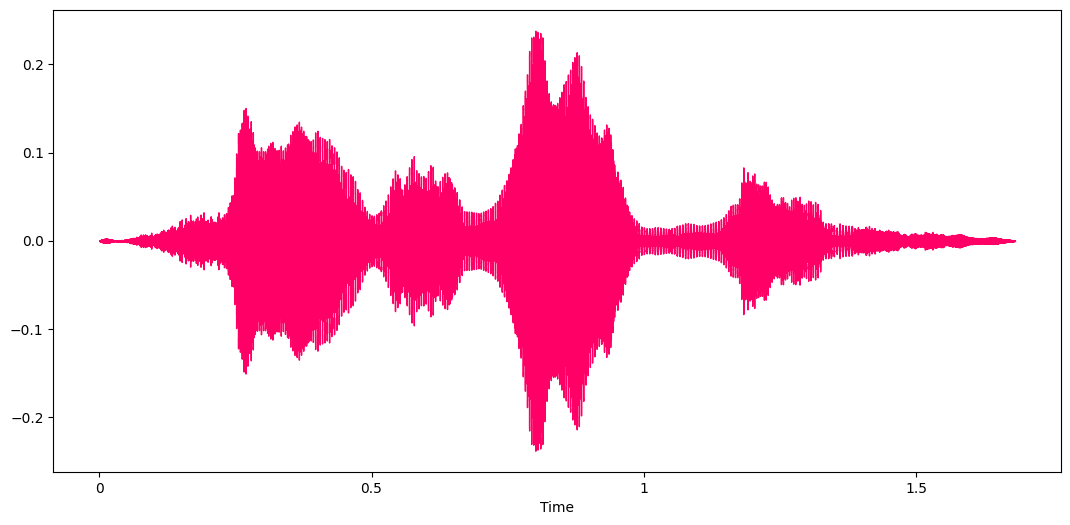

In [ ]:
audio_speech, rate = librosa.load(Main_Wav_Data['WAV'][120])

# Plot the waveform using waveshow
figure = plt.figure(figsize=(13, 6))
librosa.display.waveshow(audio_speech, sr=rate, color='#ff0066')

# Play the audio
Audio(audio_speech, rate=rate)

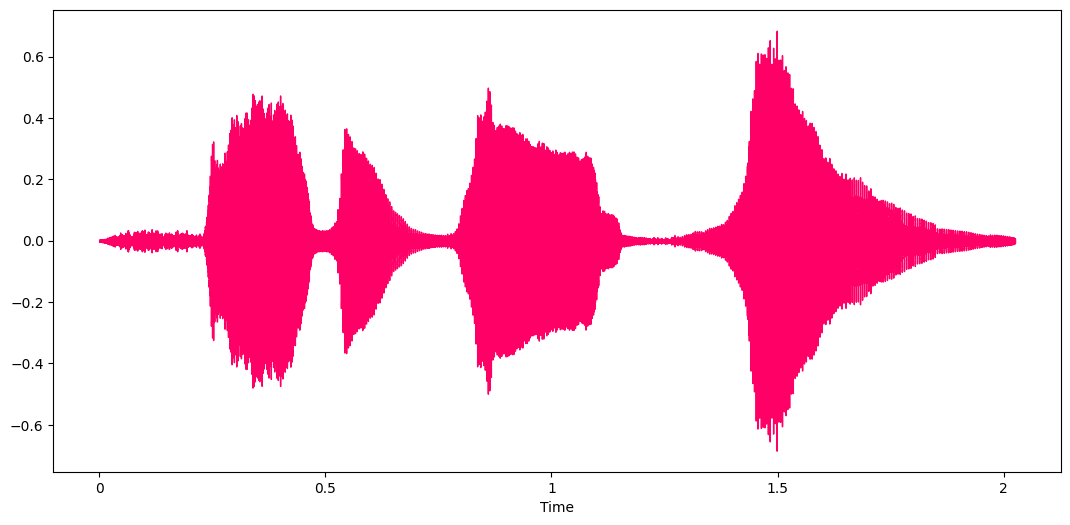

In [ ]:
figure = plt.figure(figsize=(13,6))
audio_speech,rate = librosa.load(Main_Wav_Data['WAV'][10])
librosa.display.waveshow(audio_speech, sr=rate, color='#ff0066')
Audio(audio_speech, rate=rate)

Noise:

In [ ]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    return data

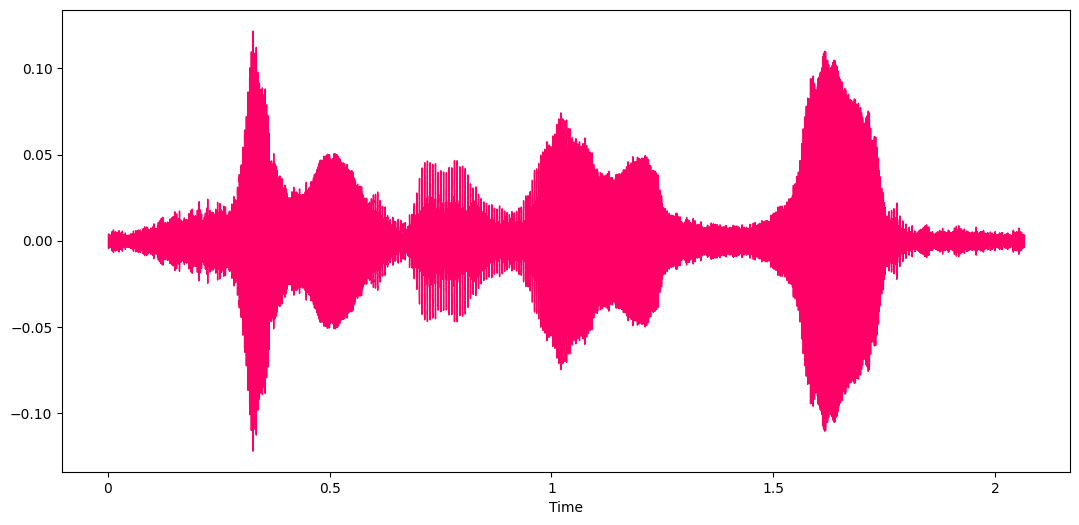

In [ ]:
audio_speech, sample_rate = librosa.load(Main_Wav_Data['WAV'][2000])

# Apply noise injection
noise_injection = add_noise(audio_speech)

# Plot the waveform using waveshow (instead of waveplot)
figure = plt.figure(figsize=(13,6))
librosa.display.waveshow(noise_injection, sr=sample_rate, color='#ff0066')

# Play the audio
Audio(noise_injection, rate=sample_rate)

Stretch:

In [ ]:
def stretch_process(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

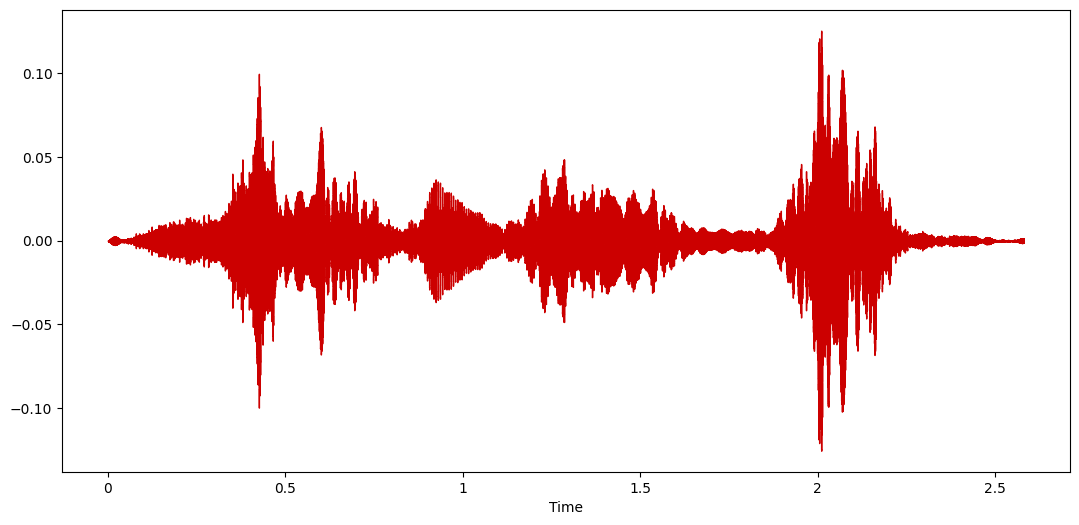

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

def stretch_process(data, rate=0.8):
    # Ensure the audio data is floating point
    data = np.asarray(data, dtype=np.float32)

    # Apply time stretching
    return librosa.effects.time_stretch(data, rate=rate)

# Load the audio file
audio_speech, sample_rate = librosa.load(Main_Wav_Data['WAV'][2000], sr=None, mono=True)

# Apply time-stretching
stretching_audio = stretch_process(audio_speech)

# Plot the waveform using waveshow
figure = plt.figure(figsize=(13,6))
librosa.display.waveshow(stretching_audio, sr=sample_rate, color='#cc0000')

# Play the audio
Audio(stretching_audio, rate=sample_rate)


Shifting:

In [ ]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

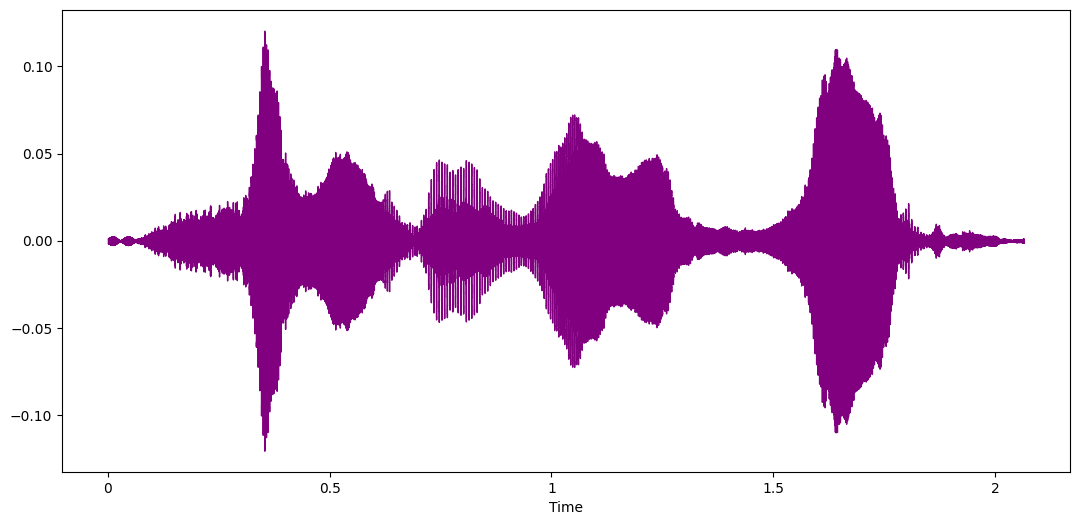

In [ ]:
# Load the audio file
audio_speech, sample_rate = librosa.load(Main_Wav_Data['WAV'][2000], sr=None)

# Apply shifting (Make sure shift_process is defined)
shifting_audio = shift_process(audio_speech)

# Plot the waveform using waveshow
figure = plt.figure(figsize=(13,6))
librosa.display.waveshow(shifting_audio, sr=sample_rate, color='purple')

# Play the audio
Audio(shifting_audio, rate=sample_rate)

Pitch:

In [ ]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):
    return librosa.effects.pitch_shift(data,sampling_rate, pitch_factor)

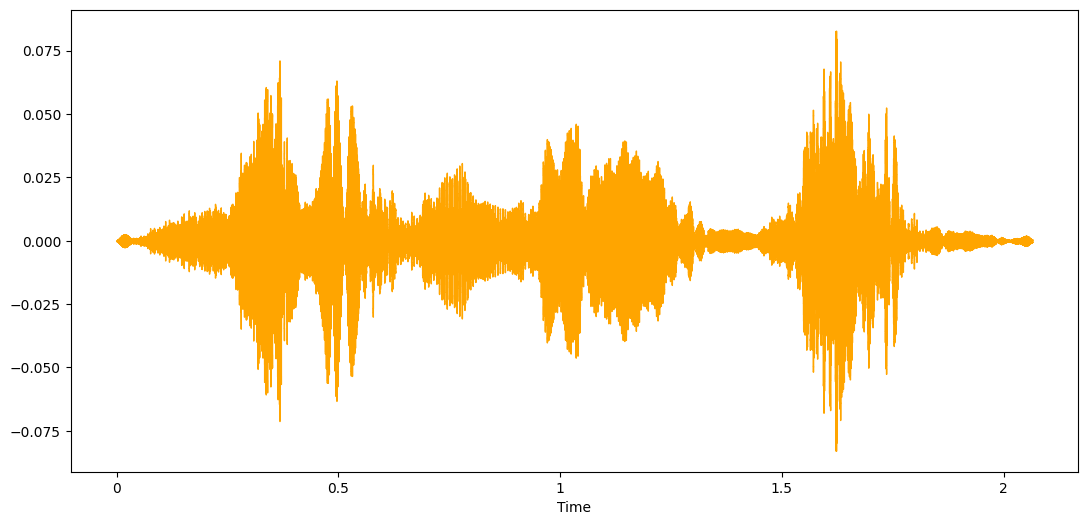

In [ ]:
def pitch_process(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

# Load the audio file
audio_speech, sample_rate = librosa.load(Main_Wav_Data['WAV'][2000], sr=None)

# Apply pitch shifting
pitch_audio = pitch_process(audio_speech, sample_rate)

# Plot the waveform using waveshow
figure = plt.figure(figsize=(13,6))
librosa.display.waveshow(pitch_audio, sr=sample_rate, color='orange')

# Play the pitch-shifted audio
Audio(pitch_audio, rate=sample_rate)

* Sound: sequence of vibrations in varying pressure strengths (y)
* The sample rate (sr) is the number of samples of audio carried per second, measured in Hz or kHz

In [ ]:
# Importing 1 file
y, sr = librosa.load(Main_Wav_Data['WAV'][2000])

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', np.shape(y)[0]/sr)

y: [-1.4884454e-06  3.6467831e-05  6.4873719e-05 ... -1.0138092e-04
 -1.2050978e-04  0.0000000e+00] 

y shape: (45535,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 2.0650793650793653


In [ ]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-1.4884454e-06  3.6467831e-05  6.4873719e-05 ... -1.0138092e-04
 -1.2050978e-04  0.0000000e+00] 

Audio File shape: (45535,)


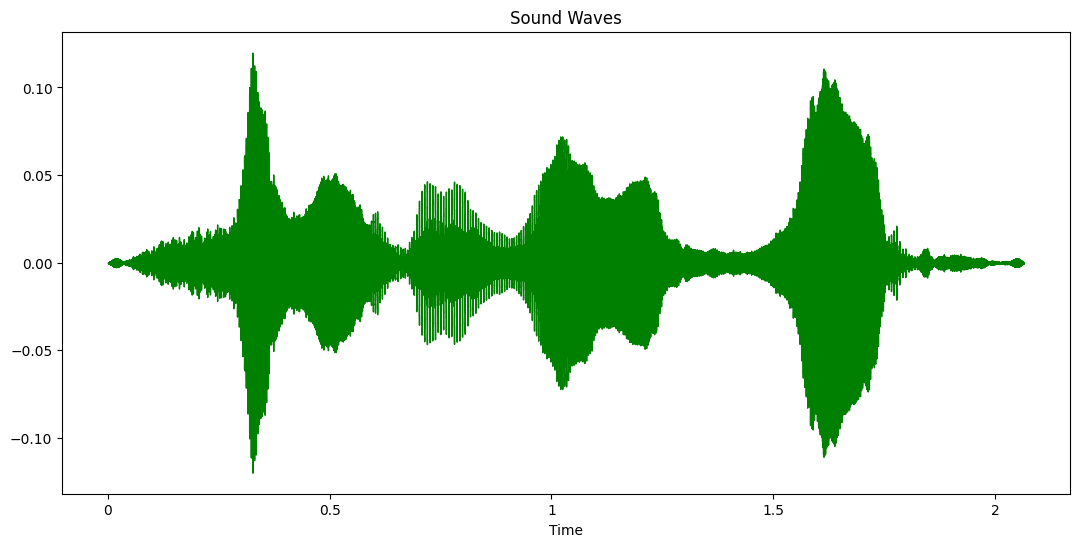

In [ ]:
plt.figure(figsize=(13, 6))
librosa.display.waveshow(y=audio_file, sr=sr, color='green')
plt.title('Sound Waves')
plt.show()


Fourier Transform:

Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

Shape of D object: (1025, 89)


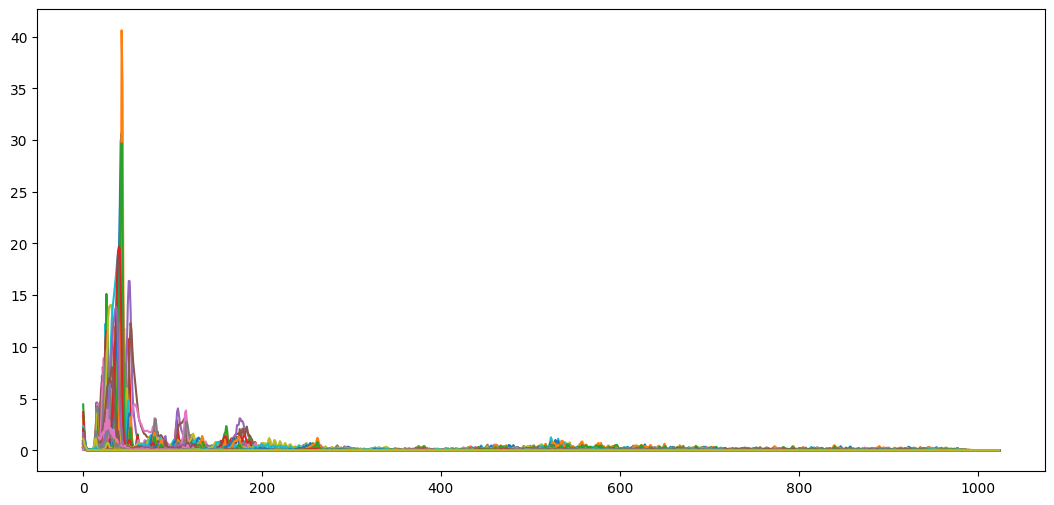

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

plt.figure(figsize = (13, 6));
plt.plot(D);

The Spectrogram:

* What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams (wiki).
* Here we convert the frequency axis to a logarithmic one.

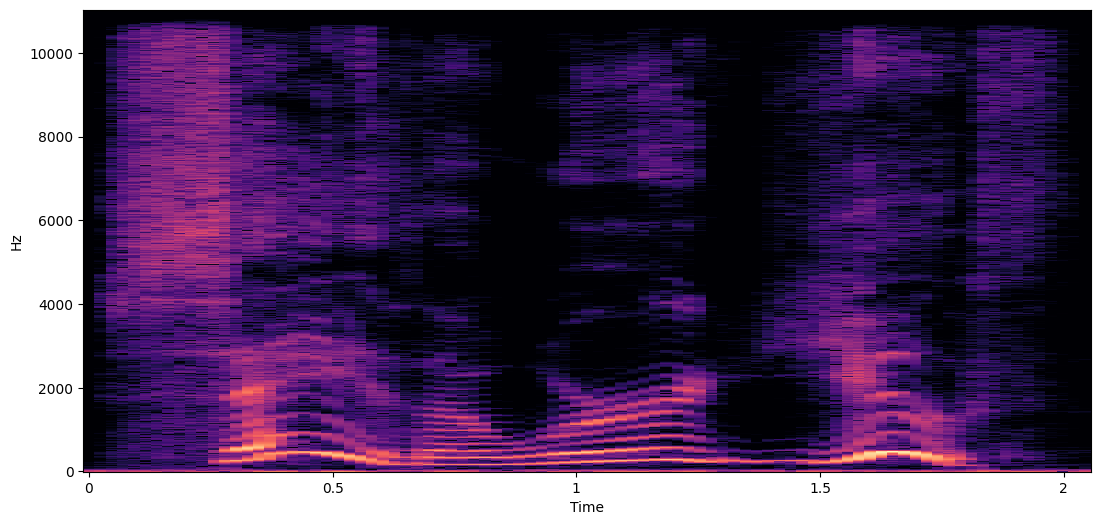

In [ ]:
figure = plt.figure(figsize=(13,6))

audio_speech,rate = librosa.load(Main_Wav_Data['WAV'][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio, sr=rate, x_axis='time', y_axis='hz')
Audio(audio_speech, rate=rate)

Mel Spectrogram:

The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

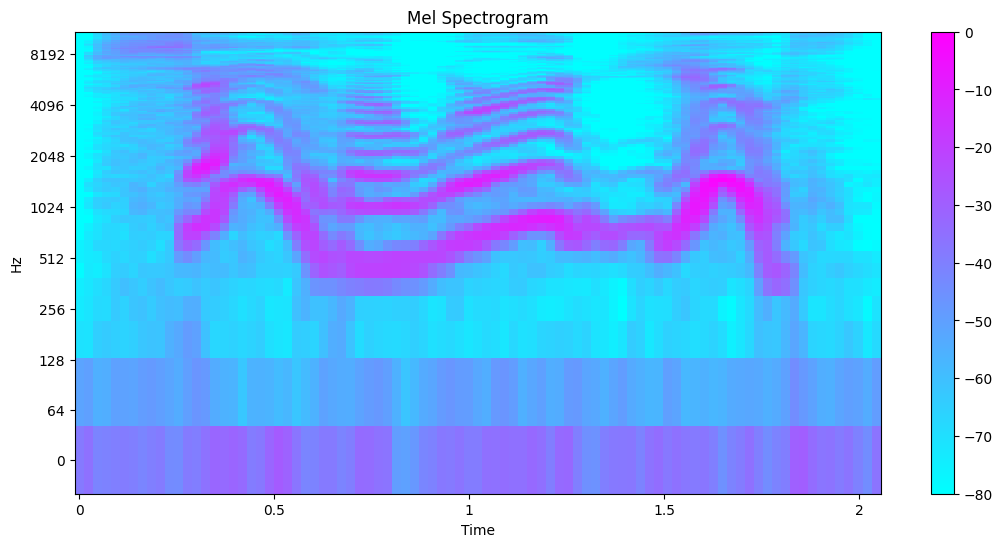

In [ ]:

hop_length = 512  # Typical value, but you can modify it

# Compute Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)

# Convert amplitude to dB
S_DB = librosa.power_to_db(S, ref=np.max)  # Use power_to_db instead of amplitude_to_db

# Plot
plt.figure(figsize=(13, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title('Mel Spectrogram')
plt.show()


Zero Crossing Rate:

the rate at which the signal changes from positive to negative or back.

In [ ]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

4155


Harmonics and Perceptrual:

* Harmonics are characteristichs that human years can't distinguish (represents the sound color)
* Perceptrual understanding shock wave represents the sound rhythm and emotion

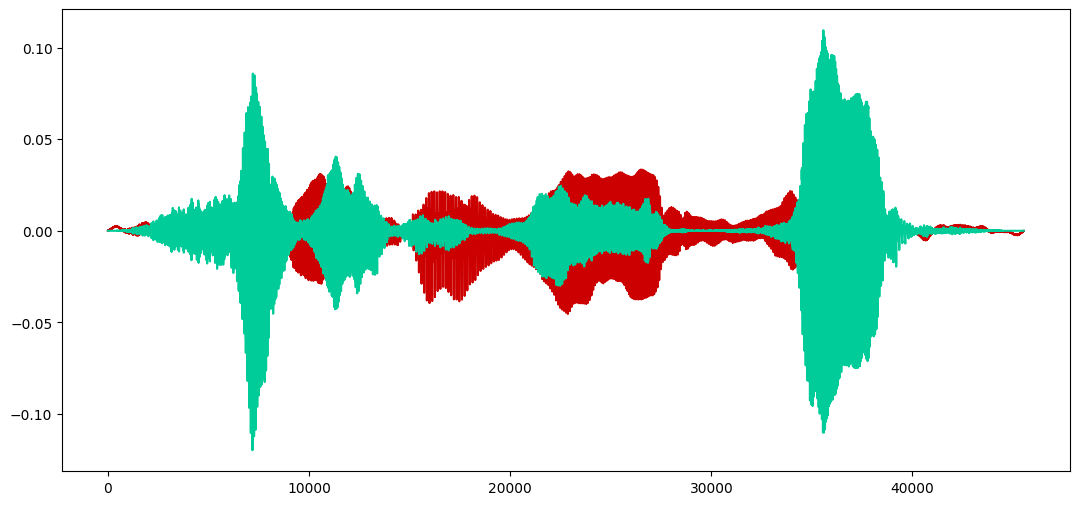

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (13, 6))
plt.plot(y_harm, color = '#cc0000');
plt.plot(y_perc, color = '#00cc99');

Tempo BMP (beats per minute):

Dynamic programming beat tracker.

In [ ]:

# Estimate the tempo (beats per minute) and beat frames
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

# Print the estimated tempo
print("Estimated Tempo: {:.2f} BPM".format(tempo[0]))

Estimated Tempo: 69.84 BPM


Spectral Centroid:

indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)


Centroids: [1305.14968038 3033.8621377  4977.50053051 5567.49235568 5885.98121474
 6062.28247448 6160.93285096 6267.54477063 6333.36186156 6318.7380058
 6343.11129449 6006.06823137 4364.12914945 2015.86230064 1548.34890903
 1471.77430567 1564.94296193 1960.25069035 2111.88760333 2180.16251455
 1882.06607053 1444.94330523 1149.31921354 1233.30805814 1640.71026352
 1766.95590248 1402.0924912  1435.65090648 1909.23627256 1334.78872547
 1083.33969107 1142.08344375 1280.81526199 1239.63463701 1001.72917348
  827.44490383  667.50410847  569.26577804  531.61642295  567.52973652
  621.07178432  686.86560714  846.71023596 1066.61896701 1080.07852915
 1023.36777879 1056.61096982 1096.68954457 1276.45097475 1579.38239449
 1560.73725187 1577.8155892  1519.35720392 1438.73781655 1272.40400496
  959.44793936  796.58360596  908.34400193  893.45968757 1043.83622057
 1803.45744713 2468.26294815 2586.98819083 2283.97001078 2090.24106074
 2287.36181585 1898.00851551 1620.27846862 1488.36049184 1202.03830

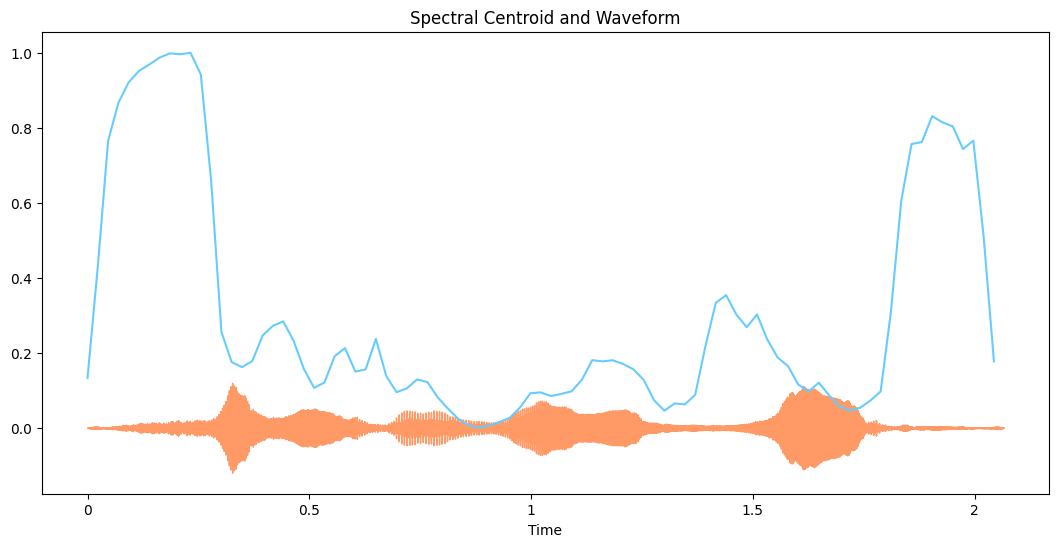

In [ ]:


# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (13, 6))

# Using waveshow instead of waveplot
librosa.display.waveshow(audio_file, sr=sr, color = '#ff9966')

# Plotting the Spectral Centroids
plt.plot(t, normalize(spectral_centroids), color='#66ccff')

plt.title('Spectral Centroid and Waveform')
plt.show()


Spectral Rolloff:

is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

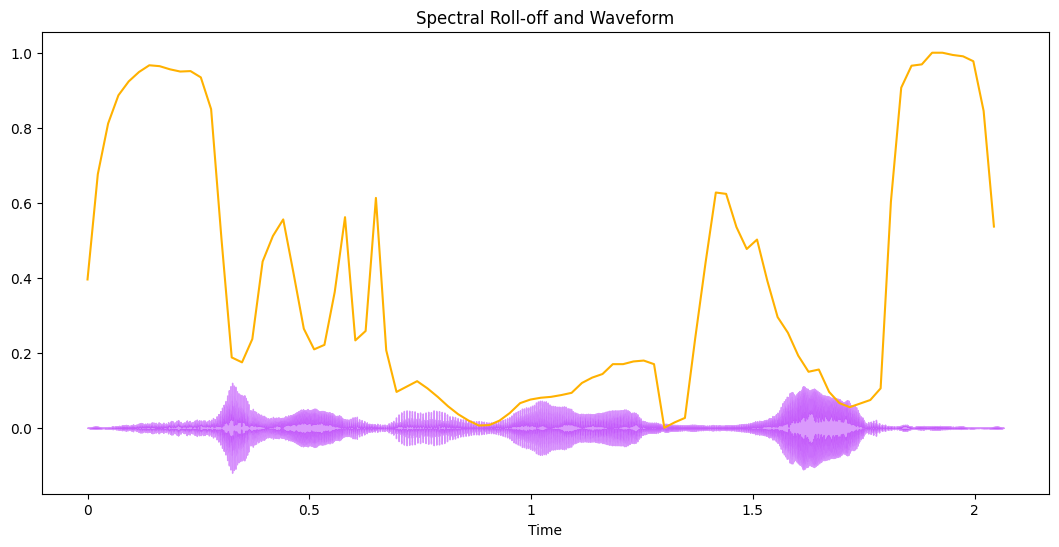

In [ ]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (13, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9')
plt.plot(t, normalize(spectral_rolloff), color='#FFB100')

plt.title('Spectral Roll-off and Waveform')
plt.show()


Mel-Frequency Cepstral Coefficients:

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 89)


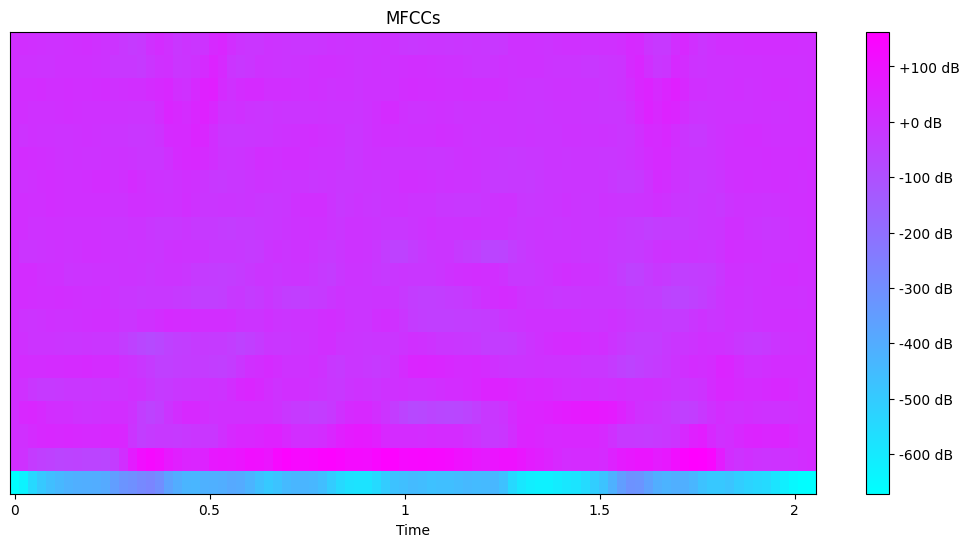

In [ ]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)

print('mfccs shape:', mfccs.shape)

# Displaying the MFCCs
plt.figure(figsize = (13, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.show()


# <a name='Preprocessing'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
3. Preprocessing</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
def extract_process(data):

    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))

    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))

    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))

    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))

    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_spectogram))

    return output_result

In [ ]:
def export_process(path):

    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)

    output_1 = extract_process(data)
    result = np.array(output_1)

    noise_out = add_noise(data)
    output_2 = extract_process(noise_out)
    result = np.vstack((result,output_2))

    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch)
    result = np.vstack((result,output_3))

    return result

In [ ]:
X_train, y_train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV, Main_Wav_Data.EMOTION):

    features = export_process(path)

    for element in features:
        X_train.append(element)
        y_train.append(emotion)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(Main_Wav_Data.WAV))
print(X_train[0].shape)

8400
8400
2800
(162,)


In [ ]:
New_Features_Wav = pd.DataFrame(X_train)
New_Features_Wav['EMOTIONS'] = y_train

New_Features_Wav.to_csv('New_Wav_Set.csv', index=False)
New_Features_Wav.head(5)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.069280,0.390585,0.496898,0.462603,0.431891,0.423364,0.501107,0.620030,0.561526,0.477491,...,0.000128,0.000123,0.000188,0.000248,0.000364,0.000230,0.000329,0.000166,0.000008,OAF_happy
1,0.100746,0.416426,0.491783,0.523977,0.485339,0.463597,0.494975,0.616625,0.623322,0.497031,...,0.000171,0.000159,0.000227,0.000285,0.000410,0.000280,0.000360,0.000198,0.000046,OAF_happy
2,0.097731,0.484591,0.434031,0.561716,0.528817,0.438888,0.414652,0.499754,0.673859,0.603681,...,0.000024,0.000023,0.000030,0.000032,0.000059,0.000072,0.000058,0.000022,0.000005,OAF_happy
3,0.083712,0.453016,0.443948,0.475885,0.394044,0.348293,0.393638,0.411015,0.523678,0.533025,...,0.000100,0.000141,0.000182,0.000217,0.000189,0.000147,0.000068,0.000046,0.000005,OAF_happy
4,0.138728,0.475234,0.496560,0.542849,0.455928,0.417738,0.456125,0.479389,0.577224,0.555436,...,0.000194,0.000235,0.000272,0.000306,0.000269,0.000250,0.000160,0.000136,0.000092,OAF_happy


In [ ]:
print(New_Features_Wav['EMOTIONS'].value_counts())

EMOTIONS
OAF_happy                 600
OAF_Pleasant_surprise     600
YAF_neutral               600
OAF_Fear                  600
YAF_sad                   600
YAF_pleasant_surprised    600
YAF_happy                 600
OAF_neutral               600
OAF_Sad                   600
YAF_angry                 600
YAF_fear                  600
YAF_disgust               600
OAF_angry                 600
OAF_disgust               600
Name: count, dtype: int64


In [ ]:
encoder_label = OneHotEncoder()
scaler_data = StandardScaler()

In [ ]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav['EMOTIONS'].values

print(X.shape)
print(Y.shape)

(8400, 162)
(8400,)


In [ ]:
Y = encoder_label.fit_transform(np.array(Y).reshape(-1,1)).toarray()
print(Y.shape)

(8400, 14)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7560, 162)
(7560, 14)
(840, 162)
(840, 14)


In [ ]:
X_train = scaler_data.fit_transform(X_train)
X_test = scaler_data.transform(X_test)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7560, 162, 1)
(840, 162, 1)


# <a name='Model_and_Prediction'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
4. Model and Prediction</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
Model = tf.keras.models.Sequential()
Model.add(tf.keras.layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
Model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(tf.keras.layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(tf.keras.layers.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(tf.keras.layers.Dropout(0.2))

Model.add(tf.keras.layers.Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(tf.keras.layers.Flatten())
Model.add(tf.keras.layers.Dense(units=32, activation='relu'))
Model.add(tf.keras.layers.Dropout(0.3))

Model.add(tf.keras.layers.Dense(units=14, activation='softmax'))

Model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │           462 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,486 (2.13 MB)

 Trainable params: 557,486 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

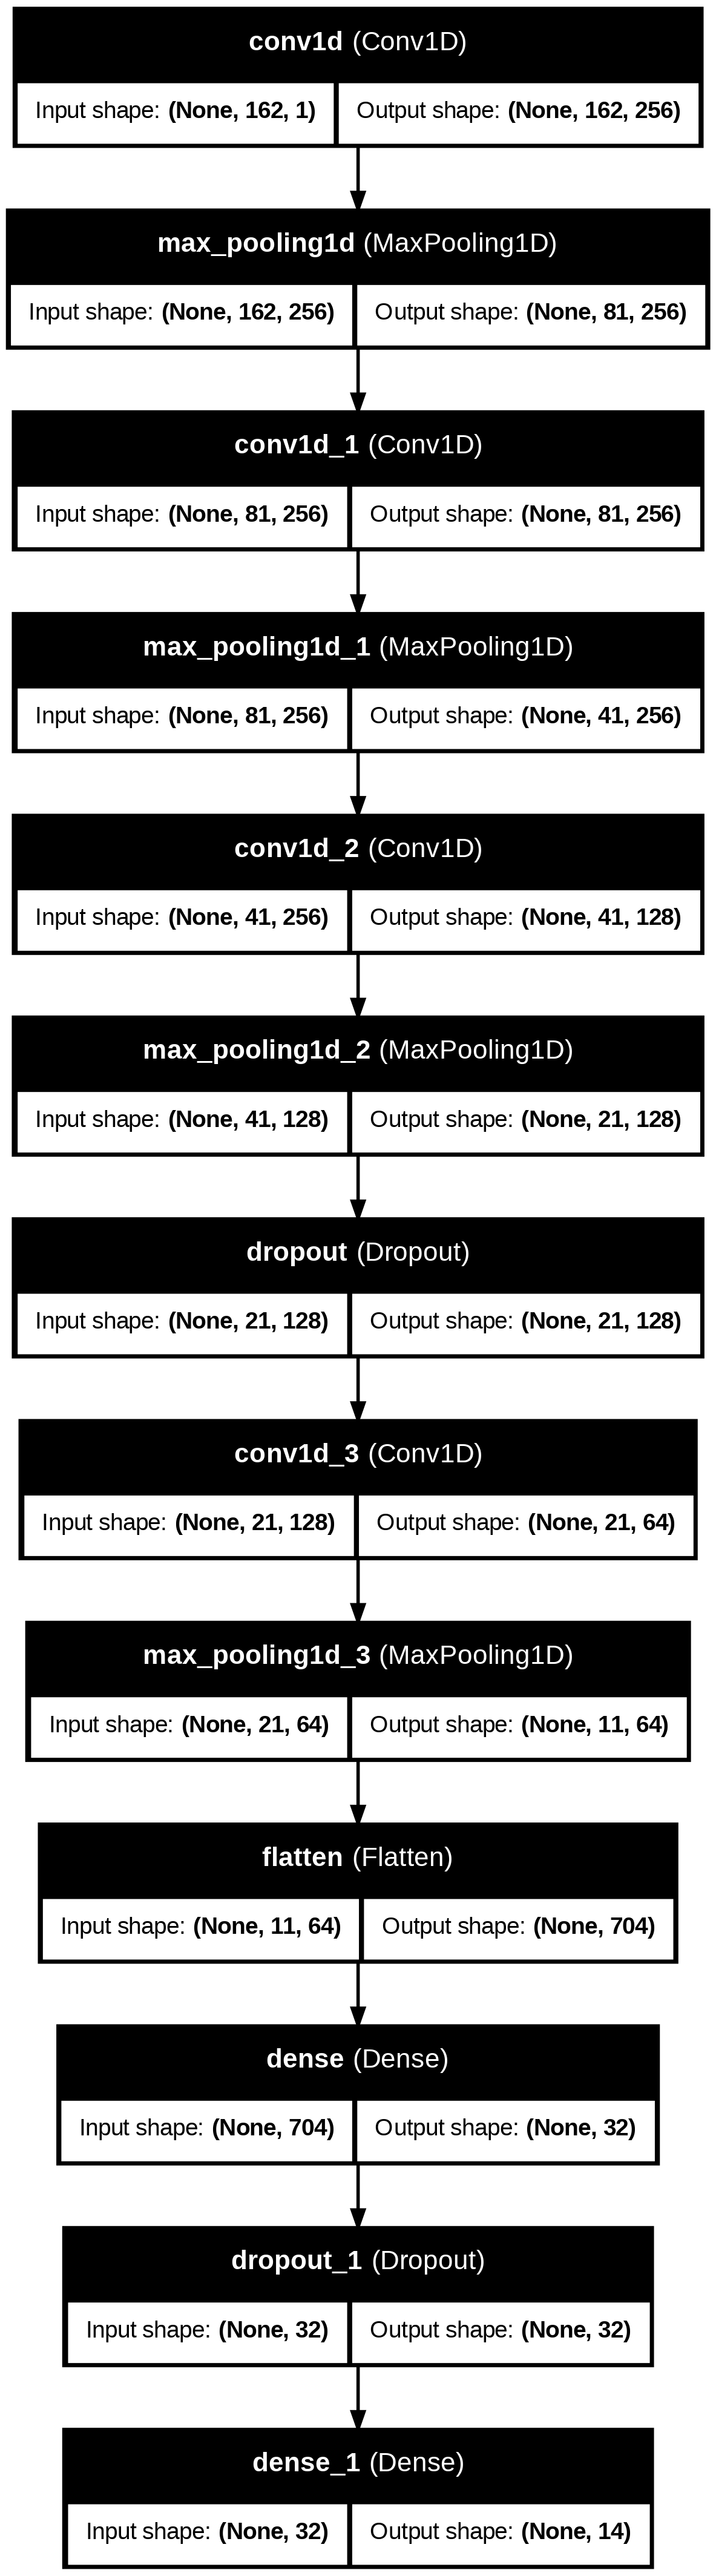

In [ ]:
plot_model(Model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(f"X_train dtype: {X_train.dtype}")
print(f"y_train dtype: {y_train.dtype}")


X_train dtype: float64
y_train dtype: float64


In [ ]:
Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = Model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.2440 - loss: 2.1987 - val_accuracy: 0.7810 - val_loss: 0.7695
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7082 - loss: 0.8670 - val_accuracy: 0.9012 - val_loss: 0.2905
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8434 - loss: 0.4726 - val_accuracy: 0.9214 - val_loss: 0.2636
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8692 - loss: 0.3942 - val_accuracy: 0.9619 - val_loss: 0.1198
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9196 - loss: 0.2482 - val_accuracy: 0.9738 - val_loss: 0.1023


In [ ]:
Model.save('speech-emotion-recognition.keras')  # Save using new format


<ipython-input-60-b03e59da73e4>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot  (epochs, acc, 'bo', color = '#ff0066')
<ipython-input-60-b03e59da73e4>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot  (epochs, loss, 'bo', color = '#ff0066')


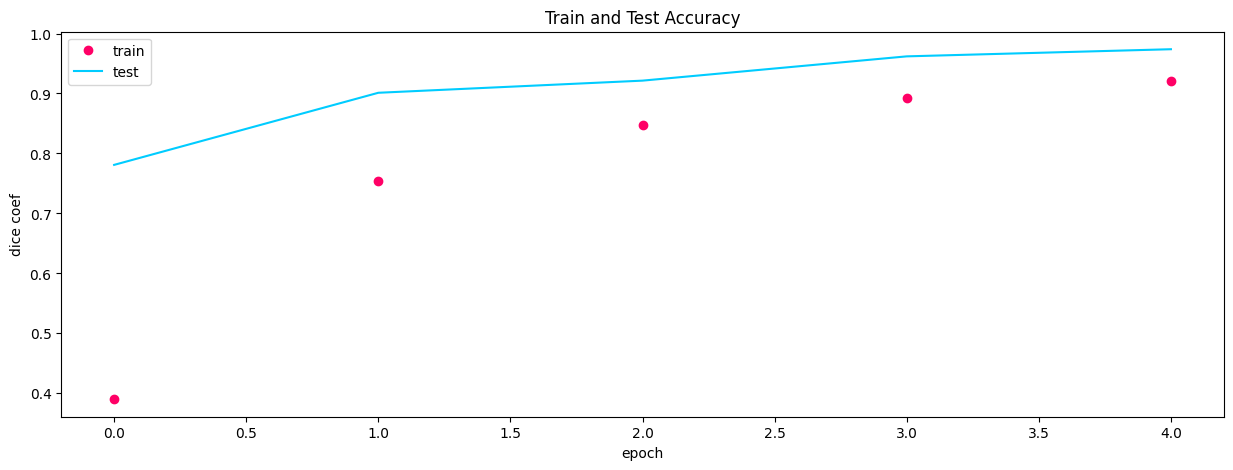

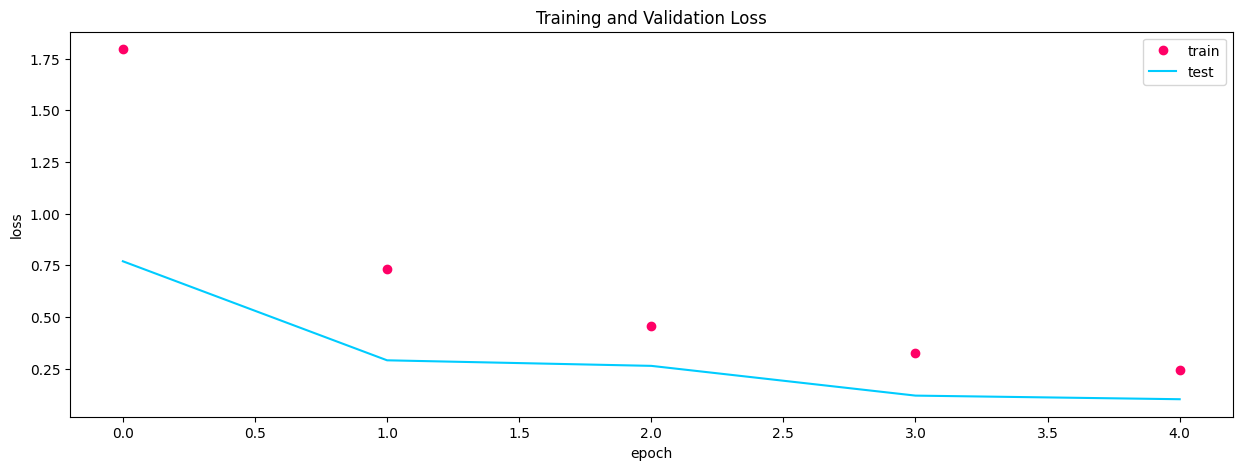

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on train and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and test accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(15,5))
plt.plot  (epochs, acc, 'bo', color = '#ff0066')
plt.plot  (epochs, val_acc, color = '#00ccff')
plt.title ('Train and Test Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('dice coef')
plt.xlabel('epoch');

#------------------------------------------------
# Plot training and test loss per epoch
#------------------------------------------------
plt.figure(figsize=(15,5))
plt.plot  (epochs, loss, 'bo', color = '#ff0066')
plt.plot  (epochs, val_loss, color = '#00ccff')
plt.legend(['train', 'test'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title ('Training and Validation Loss');

In [ ]:
model = load_model('speech-emotion-recognition.keras')

In [ ]:
print(y_test[:5])  # Check the first few rows of y_test to ensure it's one-hot encoded


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
results = model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9467 - loss: 0.1440


In [ ]:
print('Test loss: ', results[0])
print('Test Acuuracy: ', results[1])

Test loss:  0.14372460544109344
Test Acuuracy:  0.9523809552192688


In [ ]:
prediction_test = Model.predict(X_test)
y_prediction = encoder_label.inverse_transform(prediction_test)

y_test = encoder_label.inverse_transform(y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [ ]:
X_test

array([[[-0.99789176],
        [-1.09531686],
        [-1.6029031 ],
        ...,
        [-0.16174473],
        [-0.16433196],
        [-0.25163222]],

       [[ 0.78851172],
        [ 0.29651219],
        [ 0.30984199],
        ...,
        [ 1.08613357],
        [ 1.15764896],
        [ 5.37108769]],

       [[-0.26248215],
        [-0.06882061],
        [ 0.18656172],
        ...,
        [-0.14063616],
        [-0.13351196],
        [-0.11711614]],

       ...,

       [[ 0.35378261],
        [ 1.49643695],
        [ 1.10436554],
        ...,
        [-0.16354079],
        [-0.16498047],
        [-0.25099982]],

       [[ 0.30370214],
        [ 0.62180751],
        [ 0.7062    ],
        ...,
        [-0.14318138],
        [-0.13351431],
        [-0.23507311]],

       [[-0.87066625],
        [ 0.148439  ],
        [ 0.38265187],
        ...,
        [-0.17160619],
        [-0.16856762],
        [-0.25217059]]])

In [ ]:
print(prediction_test[0:10])

[[9.99999404e-01 1.44093759e-09 3.35255873e-15 6.12735906e-09
  9.84727508e-11 3.40367601e-09 7.49132312e-08 6.56644505e-15
  3.99057868e-17 4.02782803e-07 1.49210834e-07 2.50335424e-13
  1.17954832e-12 5.44088305e-17]
 [3.83199399e-14 9.88799835e-15 1.10068054e-16 1.14596145e-13
  1.61995715e-08 6.21363962e-19 3.64823470e-16 7.02409889e-05
  5.00563024e-13 1.24176472e-06 9.99928474e-01 2.04232332e-14
  4.85484951e-11 6.25370936e-11]
 [6.79109780e-06 3.35517853e-01 6.44725515e-06 1.08107834e-05
  4.18839697e-03 6.60187602e-01 5.32561126e-06 1.78071957e-07
  2.04801310e-07 2.84562302e-05 1.74197703e-06 2.55779682e-08
  3.84852319e-05 7.55115980e-06]
 [1.52830483e-15 4.30932765e-08 1.14171161e-09 1.81928870e-14
  3.11798067e-05 3.71716546e-10 3.46329541e-12 1.17133574e-08
  7.78498510e-09 4.50546093e-11 3.94674180e-06 2.85061753e-12
  1.72225689e-11 9.99964833e-01]
 [7.77881937e-09 5.28769102e-04 9.77327347e-01 6.90529633e-09
  2.11608429e-02 6.69103465e-04 2.26729928e-04 2.52506265e-08


In [ ]:
print(y_prediction[0:10])

[['OAF_Fear']
 ['YAF_happy']
 ['OAF_happy']
 ['YAF_sad']
 ['OAF_Sad']
 ['OAF_Fear']
 ['OAF_neutral']
 ['YAF_sad']
 ['OAF_angry']
 ['YAF_happy']]


In [ ]:
print(y_test[0:10])

[['OAF_Fear']
 ['YAF_happy']
 ['OAF_Pleasant_surprise']
 ['YAF_sad']
 ['OAF_Sad']
 ['OAF_Fear']
 ['OAF_neutral']
 ['YAF_sad']
 ['OAF_angry']
 ['YAF_happy']]


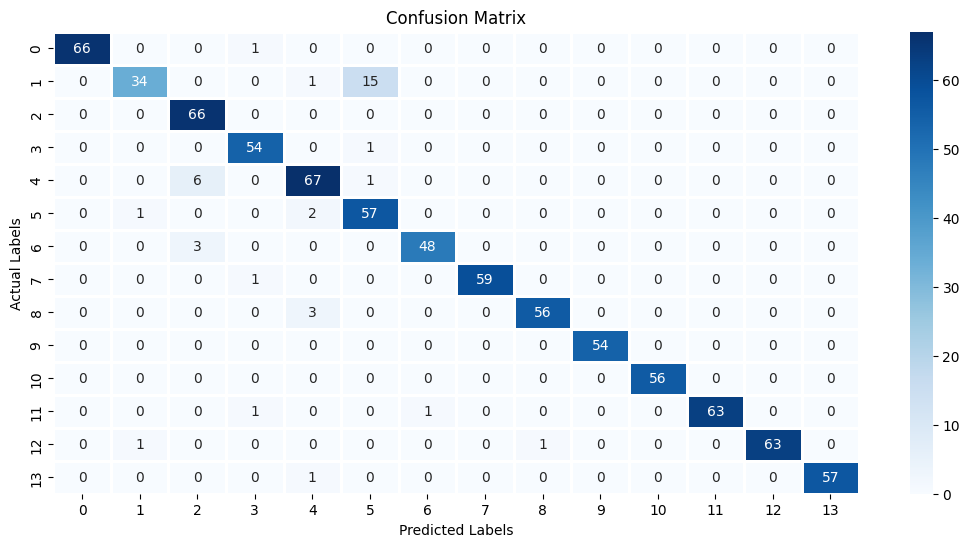

In [ ]:
conf_matrix = confusion_matrix(y_test, y_prediction)

plt.figure(figsize=(13,6))
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');

In [ ]:
print(classification_report(y_test, y_prediction))

                        precision    recall  f1-score   support

              OAF_Fear       1.00      0.99      0.99        67
 OAF_Pleasant_surprise       0.94      0.68      0.79        50
               OAF_Sad       0.88      1.00      0.94        66
             OAF_angry       0.95      0.98      0.96        55
           OAF_disgust       0.91      0.91      0.91        74
             OAF_happy       0.77      0.95      0.85        60
           OAF_neutral       0.98      0.94      0.96        51
             YAF_angry       1.00      0.98      0.99        60
           YAF_disgust       0.98      0.95      0.97        59
              YAF_fear       1.00      1.00      1.00        54
             YAF_happy       1.00      1.00      1.00        56
           YAF_neutral       1.00      0.97      0.98        65
YAF_pleasant_surprised       1.00      0.97      0.98        65
               YAF_sad       1.00      0.98      0.99        58

              accuracy                